In [49]:
import json
import requests
import datetime
import base64
import seaborn as sns

In [21]:
from config import client_id
from config import client_secret

In [22]:
import pandas as pd 
import scipy.stats as stats

In [23]:
from urllib.parse import urlencode

In [24]:
from matplotlib import pyplot as plt
import numpy as np

In [25]:
csv_path = "../Resources/top_songs_of_2010_decade.csv"

In [26]:
decade_df = pd.read_csv(csv_path, encoding = 'cp1252')

In [27]:
del decade_df["Unnamed: 0"]
decade_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [28]:
narrowed_df = decade_df.drop(['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'], axis = 1)
narrowed_df.head()

,title,artist,top genre,year
0,"Hey, Soul Sister",Train,neo mellow,2010
1,Love The Way You Lie,Eminem,detroit hip hop,2010
2,TiK ToK,Kesha,dance pop,2010
3,Bad Romance,Lady Gaga,dance pop,2010
4,Just the Way You Are,Bruno Mars,pop,2010


In [124]:
narrowed_df["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
australian dance               6
hip pop                        6
complextro                     6
edm                            5
australian pop                 5
atl hip hop                    5
hip hop                        4
permanent wave                 4
latin                          4
tropical house                 3
colombian pop                  3
candy pop                      2
folk-pop                       2
escape room                    2
acoustic pop                   2
brostep                        2
electro                        2
detroit hip hop                2
downtempo                      2
electronic

In [78]:
group_by_year = narrowed_df.groupby(["year"])
group_by_year

In [31]:
year_count = group_by_year["year"].count()
year_count

year
2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: year, dtype: int64

ValueError: If using all scalar values, you must pass an index

In [44]:
group_year_genre = group_by_year["top genre"].value_counts()

In [179]:
decade_genre_df = pd.DataFrame({"# of Songs" : group_year_genre})

#decade_genre_df[(decade_genre_df["top genre"] == "pop")]

decade_genre_df

# of Songs
year top genre                  
2010 dance pop                31
     atl hip hop               3
     hip pop                   3
     pop                       3
     australian pop            2
...                          ...
2019 brostep                   1
     canadian pop              1
     edm                       1
     electronic trap           1
     latin                     1

[147 rows x 1 columns]

In [173]:
new_index_decade_genre_df = decade_genre_df.reset_index()
#new_index_decade_genre_df["top genre"].value_counts()
narrowed_df["top genre"] == 'pop'

0      False
1      False
2      False
3      False
4       True
       ...  
598    False
599     True
600    False
601    False
602    False
Name: top genre, Length: 603, dtype: bool

In [163]:
pop = narrowed_df.loc[narrowed_df["top genre"] == "pop"]
pop = pop.drop(columns="top genre").reset_index(drop=True)

dancepop = narrowed_df.loc[narrowed_df["top genre"] == "dance pop"]
dancepop = dancepop.drop(columns="top genre").reset_index(drop=True)

canadianpop = narrowed_df.loc[narrowed_df["top genre"] == "canadian pop"]
canadianpop = canadianpop.drop(columns="top genre").reset_index(drop=True)

barbadianpop = narrowed_df.loc[narrowed_df["top genre"] == "barbadian pop"]
barbadianpop = barbadianpop.drop(columns="top genre").reset_index(drop=True)

bigroom = narrowed_df.loc[narrowed_df["top genre"] == "big room"]
bigroom = bigroom.drop(columns="top genre").reset_index(drop=True)

artpop = narrowed_df.loc[narrowed_df["top genre"] == "art pop"]
artpop = artpop.drop(columns="top genre").reset_index(drop=True)

electropop = narrowed_df.loc[narrowed_df["top genre"] == "electropop"]
electropop = electropop.drop(columns="top genre").reset_index(drop=True)

britishsoul = narrowed_df.loc[narrowed_df["top genre"] == "british soul"]
britishsoul = britishsoul.drop(columns="top genre").reset_index(drop=True)

In [171]:
canadianpop 

,title,artist,year
0,Baby,Justin Bieber,2010
1,What the Hell,Avril Lavigne,2011
2,Call Me Maybe,Carly Rae Jepsen,2012
3,Beauty And A Beat,Justin Bieber,2012
4,Boyfriend,Justin Bieber,2012
5,Rock N Roll,Avril Lavigne,2013
6,Heartbreaker,Justin Bieber,2013
7,Love Yourself,Justin Bieber,2015
8,Sorry,Justin Bieber,2015
9,What Do You Mean?,Justin Bieber,2015


In [170]:


dancepop_count = new_index_decade_genre_df.loc[new_index_decade_genre_df["top genre"] == "dance pop"]
dancepop_count = new_index_decade_genre_df.loc[new_index_decade_genre_df["top genre"] == "dance pop"]

canadianpop   

dancepop_count

,year,top genre,# of Songs
0,2010,dance pop,31
13,2011,dance pop,38
22,2012,dance pop,15
31,2013,dance pop,42
49,2014,dance pop,27
67,2015,dance pop,52
85,2016,dance pop,46
104,2017,dance pop,31
122,2018,dance pop,38
136,2019,dance pop,7


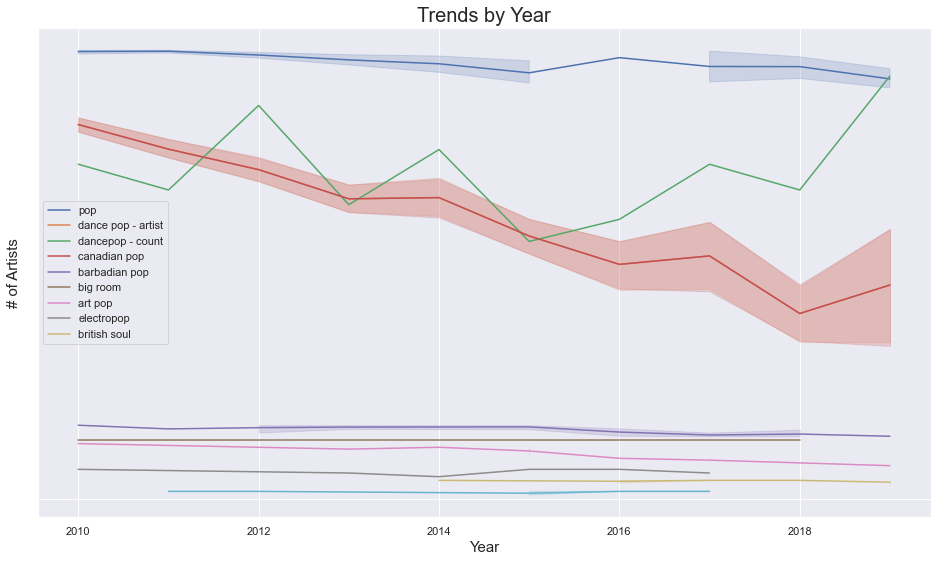

In [167]:
x_axis = new_index_decade_genre_df["year"]

plt.figure (figsize=(16,9))
sns.set(style="darkgrid")

attributes = ["pop", "dance pop - artist", "dancepop - count", "canadian pop","barbadian pop","big room", "art pop", "electropop", "british soul"]

sns.lineplot(x= "year", y= "artist", data= pop)
sns.lineplot(x= "year", y= "artist", data= dancepop)
sns.lineplot(x= "year", y= "# of Songs", data= dancepop_count)
sns.lineplot(x= "year", y= "artist", data= dancepop)
sns.lineplot(x= "year", y= "artist", data= canadianpop)
sns.lineplot(x= "year", y= "artist", data= barbadianpop)
sns.lineplot(x= "year", y= "artist", data= bigroom)
sns.lineplot(x= "year", y= "artist", data= artpop)
sns.lineplot(x= "year", y= "artist", data= electropop)
sns.lineplot(x= "year", y= "artist", data= britishsoul)
plt.yticks("artist", " ")


plt.title("Trends by Year", fontsize= 20)
plt.xlabel("Year", fontsize= 15)
plt.ylabel("# of Artists", fontsize= 15)
plt.legend(attributes)

plt.savefig("../Output Data/genre_artist_trends_by_year.png")
plt.show()